In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
import pandas as pd

data = pd.read_csv('combined_1.csv', parse_dates=['DATE'], index_col='DATE')


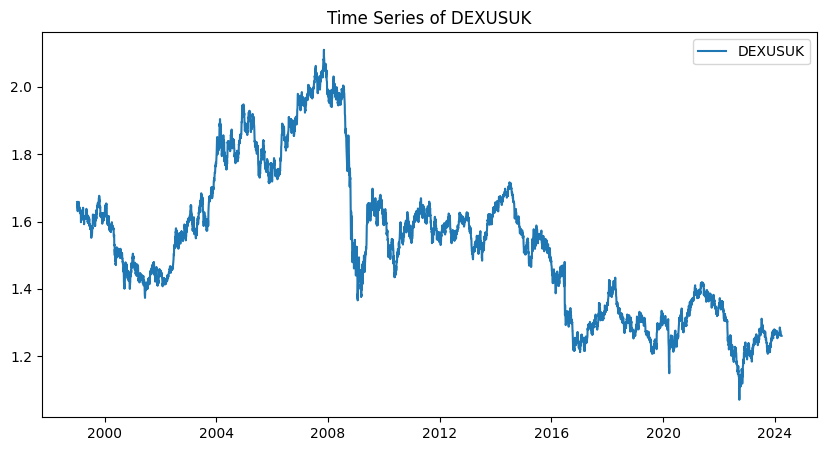

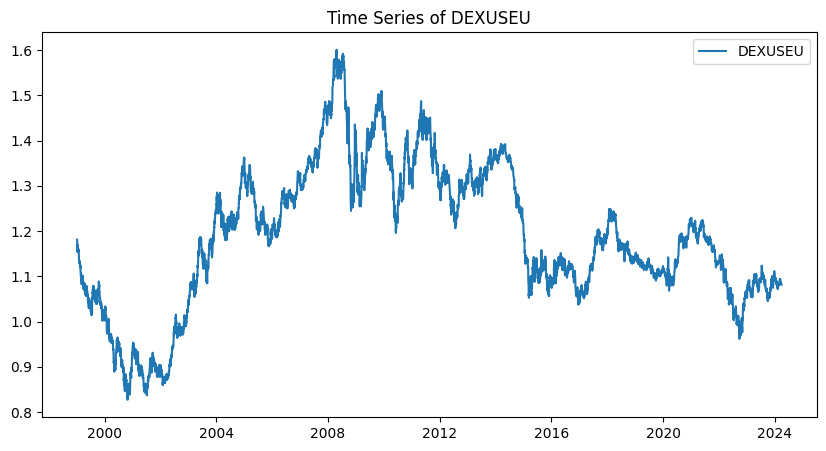

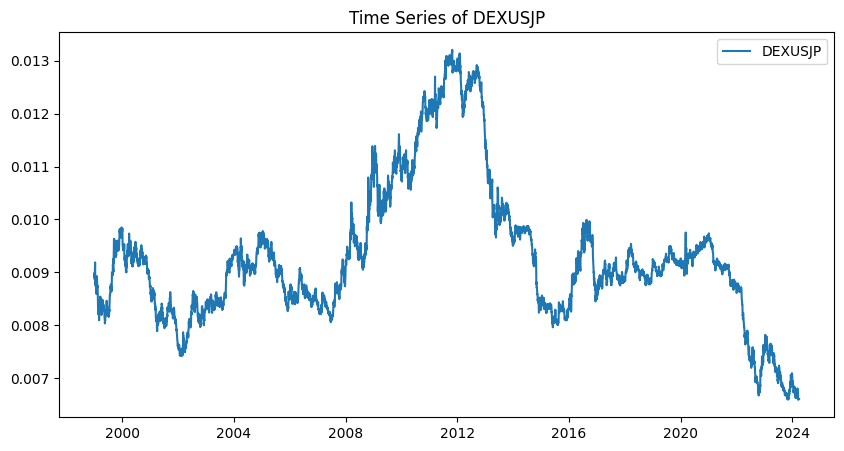

In [3]:
import matplotlib.pyplot as plt

columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']
for column in columns:
    plt.figure(figsize=(10, 5))
    plt.plot(data[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.legend()
    plt.show()


In [4]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('Result:', 'Stationary' if result[1] <= 0.05 else 'Non-Stationary')
    print()

for column in columns:
    adf_test(data[column], title=column)


Augmented Dickey-Fuller Test: DEXUSUK
ADF Test Statistic               -1.319821
p-value                           0.620056
#Lags Used                       11.000000
Number of Observations Used    6658.000000
Critical Value (1%)              -3.431333
Critical Value (5%)              -2.861974
Critical Value (10%)             -2.567001
Result: Non-Stationary

Augmented Dickey-Fuller Test: DEXUSEU
ADF Test Statistic               -1.742222
p-value                           0.409500
#Lags Used                        1.000000
Number of Observations Used    6668.000000
Critical Value (1%)              -3.431331
Critical Value (5%)              -2.861974
Critical Value (10%)             -2.567001
Result: Non-Stationary

Augmented Dickey-Fuller Test: DEXUSJP
ADF Test Statistic               -1.147645
p-value                           0.695703
#Lags Used                        0.000000
Number of Observations Used    6669.000000
Critical Value (1%)              -3.431331
Critical Value (5%)  

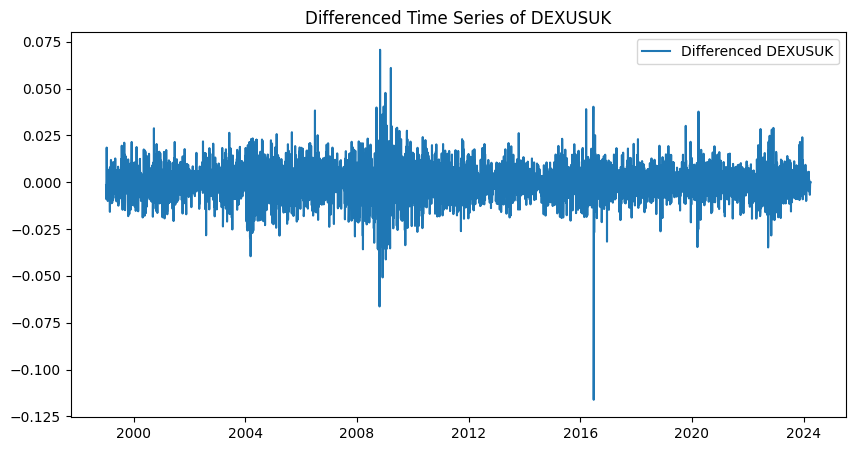

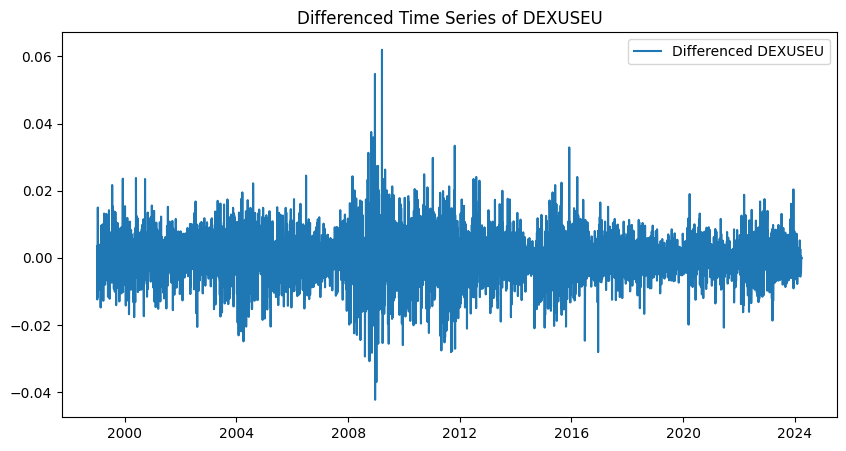

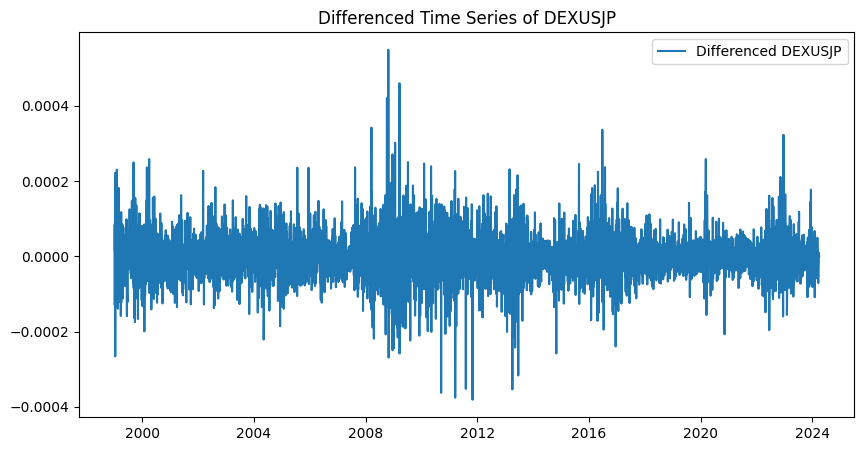

In [5]:
differenced_data = data.diff().dropna()

for column in columns:
    plt.figure(figsize=(10, 5))
    plt.plot(differenced_data[column], label=f'Differenced {column}')
    plt.title(f'Differenced Time Series of {column}')
    plt.legend()
    plt.show()


In [6]:
for column in columns:
    adf_test(differenced_data[column], title=f'Differenced {column}')
#

Augmented Dickey-Fuller Test: Differenced DEXUSUK
ADF Test Statistic              -25.999106
p-value                           0.000000
#Lags Used                       10.000000
Number of Observations Used    6658.000000
Critical Value (1%)              -3.431333
Critical Value (5%)              -2.861974
Critical Value (10%)             -2.567001
Result: Stationary

Augmented Dickey-Fuller Test: Differenced DEXUSEU
ADF Test Statistic              -79.621763
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    6668.000000
Critical Value (1%)              -3.431331
Critical Value (5%)              -2.861974
Critical Value (10%)             -2.567001
Result: Stationary

Augmented Dickey-Fuller Test: Differenced DEXUSJP
ADF Test Statistic              -81.885579
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    6668.000000
Critical Value (1%)              -3.

In [9]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the dataset
file_path = 'combined_1.csv'  # Adjust this path to your file location
data = pd.read_csv(file_path)

# Convert date column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Set the date column as the index
data.set_index('DATE', inplace=True)

# List of target and exogenous columns
target_columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']
exogenous_columns = ['SPX_Adj_Close', 'SPX_Volume', 'DowJonesClose', 'GDPC1', 'GFDEBTN',
                     'M2SL', 'MEDCPIM158SFRBCLE', 'NASDAQ_Close', 'NETFI', 'PCECTPI']

# Drop rows with any NaN values
data.dropna(inplace=True)

# Function to perform the ADF test
def adf_test(series, signif=0.05):
    result = adfuller(series.dropna(), autolag='AIC')
    p_value = result[1]
    return p_value < signif, result[1]

# Function to apply differencing
def difference(series):
    return series.diff().dropna()

# Create a DataFrame to store ADF test results
adf_results = pd.DataFrame(columns=['Variable', 'ADF Statistic', 'p-value', 'Stationary'])

# Check stationarity for target and exogenous columns
for column in target_columns + exogenous_columns:
    series = data[column]
    is_stationary, p_value = adf_test(series)
    adf_result = pd.DataFrame({
        'Variable': [column],
        'ADF Statistic': [adfuller(series.dropna())[0]], 
        'p-value': [p_value], 
        'Stationary': [is_stationary]
    })
    adf_results = pd.concat([adf_results, adf_result], ignore_index=True)
    if not is_stationary:
        print(f'{column} is non-stationary, differencing applied.')
        data[column] = difference(series)
    else:
        print(f'{column} is stationary.')

# Drop rows with any NaN values
data.dropna(inplace=True)

# Display ADF results
print(adf_results)

# Save ADF results to CSV for later reference
adf_results.to_csv('adf_test_results.csv', index=False)


DEXUSUK is non-stationary, differencing applied.
DEXUSEU is non-stationary, differencing applied.
DEXUSJP is non-stationary, differencing applied.
SPX_Adj_Close is non-stationary, differencing applied.
SPX_Volume is stationary.
DowJonesClose is non-stationary, differencing applied.
GDPC1 is non-stationary, differencing applied.
GFDEBTN is non-stationary, differencing applied.
M2SL is non-stationary, differencing applied.
MEDCPIM158SFRBCLE is stationary.
NASDAQ_Close is non-stationary, differencing applied.
NETFI is non-stationary, differencing applied.
PCECTPI is non-stationary, differencing applied.
             Variable  ADF Statistic   p-value Stationary
0             DEXUSUK      -1.319821  0.620056      False
1             DEXUSEU      -1.742222  0.409500      False
2             DEXUSJP      -1.147645  0.695703      False
3       SPX_Adj_Close       2.237874  0.998912      False
4          SPX_Volume      -2.972333  0.037560       True
5       DowJonesClose       1.467179  0.9973

In [11]:
import optuna
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

# Define a function to optimize ARIMAX parameters using Optuna
def optimize_arimax(trial, train_data, exog_data, target_column):
    p = trial.suggest_int('p', 0, 5)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 5)
    
    model = SARIMAX(train_data[target_column], order=(p, d, q), exog=exog_data)
    try:
        fitted_model = model.fit(disp=False)
        predictions = fitted_model.predict(start=0, end=len(train_data)-1, exog=exog_data)
        r2 = r2_score(train_data[target_column], predictions)
    except:
        r2 = -float('inf')
    
    return -r2  # Optuna minimizes the objective, so return negative R-squared

# Initialize a dictionary to store the best parameters for each target column
best_params = {}

# List of target columns and exogenous columns
target_columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']
exogenous_columns = ['SPX_Adj_Close', 'SPX_Volume', 'DowJonesClose', 'GDPC1', 'GFDEBTN',
                     'M2SL', 'MEDCPIM158SFRBCLE', 'NASDAQ_Close', 'NETFI', 'PCECTPI']

# Optimize parameters for each target column
for target_column in target_columns:
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: optimize_arimax(trial, data, data[exogenous_columns], target_column), n_trials=50)
    best_params[target_column] = study.best_params
    print(f'Best parameters for {target_column}: {study.best_params}')


[I 2024-06-09 14:21:20,232] A new study created in memory with name: no-name-78ae818d-18d7-45e6-95d9-22c744cfbe8a
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-06-09 14:21:23,496] Trial 0 finished with value: 0.039965

Best parameters for DEXUSUK: {'p': 2, 'd': 0, 'q': 5}


c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-06-09 14:23:54,173] Trial 0 finished with value: 0.054632114691760325 and parameters: {'p': 2, 'd': 1, 'q': 3}. Best is trial 0 with value: 0.054632114691760325.
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\

Best parameters for DEXUSEU: {'p': 0, 'd': 0, 'q': 5}


c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-06-09 14:26:13,416] Trial 0 finished with value: 0.12025237696064917 and parameters: {'p': 0, 'd': 1, 'q': 1}. Best is trial 0 with value: 0.12025237696064917.
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ag

Best parameters for DEXUSJP: {'p': 2, 'd': 0, 'q': 5}


             Variable  ADF Statistic   p-value Stationary
0             DEXUSUK      -1.319821  0.620056      False
1             DEXUSEU      -1.742222  0.409500      False
2             DEXUSJP      -1.147645  0.695703      False
3       DowJonesClose       1.467179  0.997399      False
4               GDPC1      -0.274617  0.929023      False
5             GFDEBTN       2.002648  0.998676      False
6                M2SL       0.984275  0.994097      False
7   MEDCPIM158SFRBCLE      -2.978388  0.036963       True
8        NASDAQ_Close       1.651522  0.998004      False
9               NETFI      -2.246542  0.189789      False
10            PCECTPI       0.739969  0.990603      False
11      SPX_Adj_Close       2.237874  0.998912      False
12         SPX_Volume      -2.972333  0.037560       True


c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

            Train MSE      Test MSE  Train MAE  Test MAE  Train R-squared  \
DEXUSUK  7.195353e-05  8.051645e-05   0.006282  0.006436         0.018417   
DEXUSEU  4.655295e-05  4.972953e-05   0.005033  0.005076         0.020479   
DEXUSJP  3.306960e-09  3.323826e-09   0.000041  0.000040         0.035356   

         Test R-squared  
DEXUSUK       -0.001570  
DEXUSEU       -0.029011  
DEXUSJP       -0.052834  


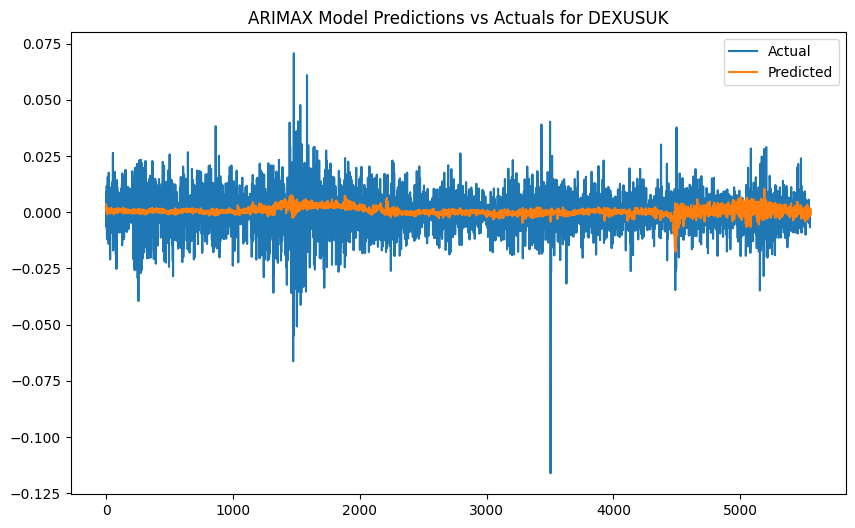

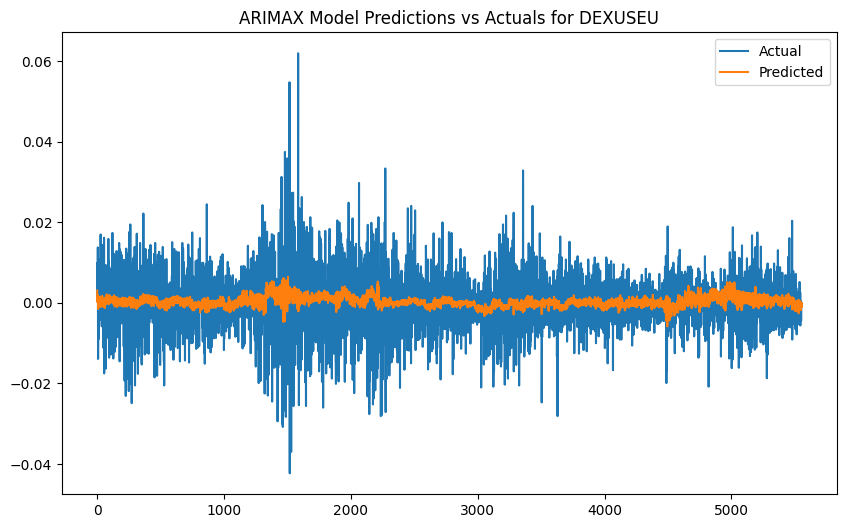

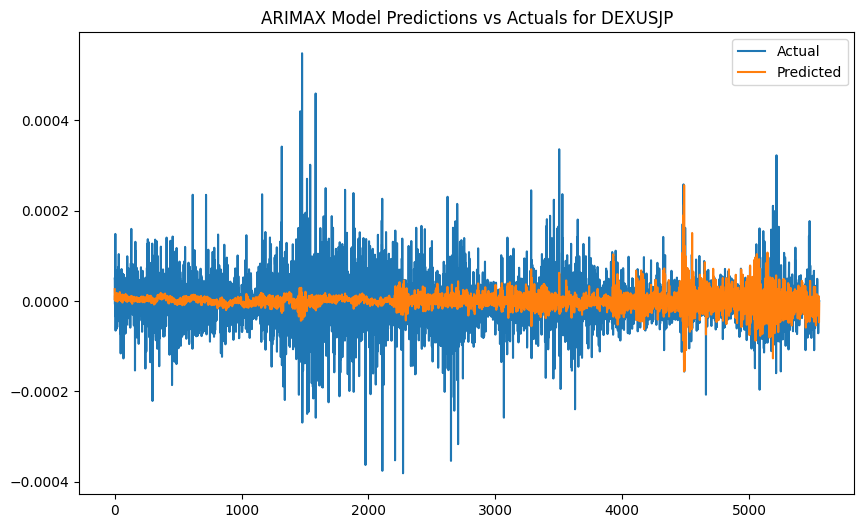

In [25]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

# Load the dataset
file_path = 'combined_1.csv'  # Adjust this path to your file location
data = pd.read_csv(file_path)

# Convert date column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Set the date column as the index
data.set_index('DATE', inplace=True)

# List of target columns
target_columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']

# List of exogenous columns
exogenous_columns = data.columns.difference(target_columns).tolist()

# Perform ADF test and difference the non-stationary series
def adf_test(series, signif=0.05):
    dftest = adfuller(series.dropna(), autolag='AIC')
    p_value = dftest[1]
    return p_value < signif, p_value

# Store ADF test results
adf_results = pd.DataFrame(columns=['Variable', 'ADF Statistic', 'p-value', 'Stationary'])

# Check stationarity for target and exogenous columns
for column in target_columns + exogenous_columns:
    series = data[column]
    is_stationary, p_value = adf_test(series)
    adf_results = pd.concat([adf_results, pd.DataFrame({'Variable': [column], 'ADF Statistic': [adfuller(series.dropna())[0]], 
                                                        'p-value': [p_value], 'Stationary': [is_stationary]})], ignore_index=True)
    if not is_stationary:
        data[column] = data[column].diff().dropna()

print(adf_results)
data.dropna(inplace=True)
# Provided best parameters
best_params = {
    'DEXUSJP': {'p': 2, 'd': 0, 'q': 5},
    'DEXUSEU': {'p': 0, 'd': 0, 'q': 5},
    'DEXUSUK': {'p': 2, 'd': 0, 'q': 5}
}

# Function to fit ARIMAX model and evaluate metrics using TimeSeriesSplit
def fit_arimax_tssplit(data, exog_data, target_column, params):
    tscv = TimeSeriesSplit(n_splits=5)
    predictions_dict = {'actuals': [], 'predictions': []}
    metrics = []
    data.dropna(inplace=True)
    for train_index, test_index in tscv.split(data):
        train_data, test_data = data.iloc[train_index], data.iloc[test_index]
        exog_train, exog_test = exog_data.iloc[train_index], exog_data.iloc[test_index]
        
        model = SARIMAX(train_data, order=(params['p'], params['d'], params['q']), exog=exog_train)
        fitted_model = model.fit(disp=False)

        train_predictions = fitted_model.predict(start=0, end=len(train_data)-1, exog=exog_train)
        test_predictions = fitted_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=exog_test)

        # Append predictions and actuals for overall plotting
        predictions_dict['actuals'].extend(test_data.values)
        predictions_dict['predictions'].extend(test_predictions)

        # Calculate performance metrics
        mse_train = mean_squared_error(train_data, train_predictions)
        mae_train = mean_absolute_error(train_data, train_predictions)
        r2_train = r2_score(train_data, train_predictions)

        mse_test = mean_squared_error(test_data, test_predictions)
        mae_test = mean_absolute_error(test_data, test_predictions)
        r2_test = r2_score(test_data, test_predictions)

        metrics.append({
            'Train MSE': mse_train,
            'Test MSE': mse_test,
            'Train MAE': mae_train,
            'Test MAE': mae_test,
            'Train R-squared': r2_train,
            'Test R-squared': r2_test
        })

    return metrics, predictions_dict

# Fit ARIMAX models and evaluate metrics for each target column
metrics = {}
predictions_storage = {}

for target_column in target_columns:
    differenced_data = data[target_column].dropna()
    exog_data = data[exogenous_columns].loc[differenced_data.index]  # Align exogenous variables with differenced target
    column_metrics, predictions_dict = fit_arimax_tssplit(differenced_data, exog_data, target_column, best_params[target_column])
    metrics[target_column] = column_metrics
    predictions_storage[target_column] = predictions_dict

# Convert metrics to DataFrame
metrics_df = pd.DataFrame({k: pd.DataFrame(v).mean() for k, v in metrics.items()}).T

# Print metrics DataFrame
print(metrics_df)

# Create DataFrame for overall predictions vs actuals
overall_predictions_df = pd.DataFrame()

for target_column, predictions_dict in predictions_storage.items():
    overall_predictions_df[f'{target_column}_Actual'] = predictions_dict['actuals']
    overall_predictions_df[f'{target_column}_Predicted'] = predictions_dict['predictions']

overall_predictions_df.to_csv('overall_predictions.csv')

# Plot predictions vs actuals for each target column
for target_column in target_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(overall_predictions_df.index, overall_predictions_df[f'{target_column}_Actual'], label='Actual')
    plt.plot(overall_predictions_df.index, overall_predictions_df[f'{target_column}_Predicted'], label='Predicted')
    plt.title(f'ARIMAX Model Predictions vs Actuals for {target_column}')
    plt.legend()

In [19]:
predictions

5335   -1.632457e-05
5336    7.388155e-07
5337   -8.353455e-06
5338   -8.254562e-06
5339    1.620354e-06
            ...     
6664    6.587086e-06
6665    1.838721e-07
6666   -4.699449e-05
6667   -1.614793e-05
6668   -5.349285e-06
Name: predicted_mean, Length: 1334, dtype: float64